# Data exploration

In [4]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime
import matplotlib.pyplot as plt

## Log file

In [40]:
df= pd.read_csv('../DataCollection/Twitch_stream_spect/Twitch_stream_collection_CLEAN.log', index_col=0)

In [41]:
df=df[(df['Cod']== 2) |(df['Cod']== 3)]
df.head()

,Time,num,Type,Cod,Message
1,2022-05-05 15:09:18,133,INFO,2,Numero di stream online: 1597
2,2022-05-05 15:09:25,487,INFO,3,Numero di spettatori online: 44353
5,2022-05-05 15:14:18,425,INFO,2,Numero di stream online: 1658
6,2022-05-05 15:14:26,874,INFO,3,Numero di spettatori online: 45230
9,2022-05-05 15:19:40,947,INFO,2,Numero di stream online: 1692


In [42]:
df['Num'] = df['Message'].str.split(':').str[1]
df['Num'] = pd.to_numeric(df['Num'])

In [43]:
df['Time'] = pd.to_datetime(df['Time'], format='%Y-%m-%d %H:%M:%S')

In [46]:
df['Hour']= df['Time'].dt.hour

In [47]:
df.head()

,Time,num,Type,Cod,Message,Num,Hour
1,2022-05-05 15:09:18,133,INFO,2,Numero di stream online: 1597,1597,15
2,2022-05-05 15:09:25,487,INFO,3,Numero di spettatori online: 44353,44353,15
5,2022-05-05 15:14:18,425,INFO,2,Numero di stream online: 1658,1658,15
6,2022-05-05 15:14:26,874,INFO,3,Numero di spettatori online: 45230,45230,15
9,2022-05-05 15:19:40,947,INFO,2,Numero di stream online: 1692,1692,15


### Streamer online

In [24]:
streamon= df[df['Cod']== 2]
streamon=streamon.groupby('Hour')['Num'].mean()
streamon= streamon.to_frame()
streamon.head()

,Num
Hour,
0,2088.771242
1,1372.298013
2,881.217949
3,564.678788
4,381.070968


Text(0.5, 1.0, 'Media di streamer online per fascia oraria')

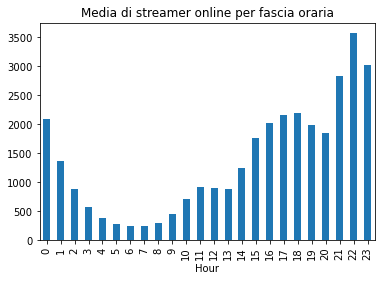

In [16]:
streamon.plot(kind='bar', legend=False)
plt.title('Media di streamer online per fascia oraria')

### Spectators online

In [25]:
specton= df[df['Cod']== 3]
specton=specton.groupby('Hour')['Num'].mean()
specton=specton.to_frame()
specton.head()

,Num
Hour,
0,88376.764706
1,63891.973510
2,41619.282051
3,24144.600000
4,13334.341935


Text(0.5, 1.0, 'Media di spettatori online per fascia oraria')

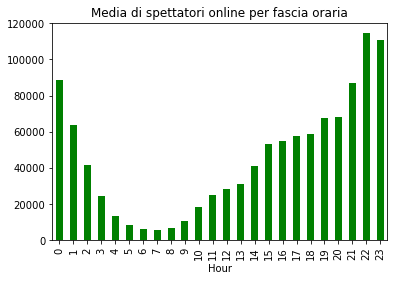

In [17]:
specton.plot(kind='bar', color= 'green', legend= False)
plt.title('Media di spettatori online per fascia oraria')

## Streamer dataset

In [48]:
streamer_dataset = pd.read_csv('Output_datasets/Streamer_dataset.csv')

In [50]:
streamer_dataset

,idStreamer,streamer,minutesLive,viewerMean,viewerPeak,spectMean,spectTot,socialLinks
0,0,LyonWGFLive,1155,14011,19727,9337,58801,https://www.youtube.com/user/WhenGamersFail; h...
1,1,Tumblurr,2925,13683,32436,10655,148019,NaN
2,2,ChristianVieriOfficial,570,11014,24931,7056,64614,https://www.instagram.com/christianvieri/; htt...
3,3,GrenBaud,1005,10285,30017,7600,78521,https://www.tiktok.com/@grenbaud; https://www....
4,4,ZanoXVII,3480,7681,13973,5699,157718,https://www.instagram.com/zanoxvii/; https://w...
...,...,...,...,...,...,...,...,...
2972,2972,QLASH_Simracing,180,10,15,5,20,https://www.instagram.com/qlash_global/; https...
2973,2973,teoKrazia,120,10,15,8,21,https://twitter.com/teoKrazia; https://www.ins...
2974,2974,yume940,225,10,23,6,27,https://www.instagram.com/leeyume940/; https:/...
2975,2975,zanella_productions,165,10,12,8,17,https://t.me/+v6EFZ-1MHo5iOWU0; https://www.in...


In [61]:
stats=streamer_dataset[['minutesLive', 'spectTot']].describe()
stats.drop('count', axis=0, inplace=True)

In [66]:
stats.rename(columns= {'minutesLive': 'minuti trascorsi in live',
                      'spectTot': 'spettatori totali'}, inplace=True)

In [67]:
stats

,minuti trascorsi in live,spettatori totali
mean,1466.684582,1656.022506
std,1735.805536,7450.436019
min,15.000000,10.000000
25%,345.000000,82.000000
50%,960.000000,231.000000
75%,2010.000000,801.000000
max,19125.000000,157718.000000


## Games dataset

In [132]:
games = pd.read_csv("Output_datasets/Games_dataset.csv")
games

,idGame,gameName,steamName,developer,publisher,releaseDate,categories
0,0,Monster Hunter Generations Ultimate,NaN,NaN,NaN,NaN,NaN
1,1,Alice: Madness Returns,Alice: Madness Returns,Spicy Horse Games,Electronic Arts,2011-06-17,3D Platformer; Action-Adventure; Hack and Slas...
2,2,Hold Fast,NaN,NaN,NaN,NaN,NaN
3,3,Pokémon Trading Card Game Online,NaN,NaN,NaN,NaN,NaN
4,4,Witch It,Witch It,Barrel Roll Games,Daedalic Entertainment,2020-10-22,Multiplayer; Funny; Casual; Action; Indie; Hid...
...,...,...,...,...,...,...,...
1139,1139,Rise of Nations: Extended Edition,Rise of Nations: Extended Edition,SkyBox Labs,Xbox Game Studios,2014-06-12,Strategy; RTS; Classic; Multiplayer; Historica...
1140,1140,Paper Mario: The Origami King,NaN,NaN,NaN,NaN,NaN
1141,1141,The Inheritance of Crimson Manor,NaN,NaN,NaN,NaN,NaN
1142,1142,Occult,NaN,NaN,NaN,NaN,NaN


In [74]:
games['releaseDate'] =  pd.to_datetime(games['releaseDate'], format='%Y-%m-%d') #convert in datetime object

### Games per year

In [120]:
temp = games.groupby(games['releaseDate'].dt.year)[['idGame']].count().tail()
temp.index = temp.index.astype(int)
temp.rename(columns= {'idGame': 'count'}, inplace=True)
temp

,count
releaseDate,
2018,45
2019,31
2020,41
2021,78
2022,46


Text(0.5, 1.0, 'Videogiochi usciti negli ultimi 5 anni presenti su steamDB')

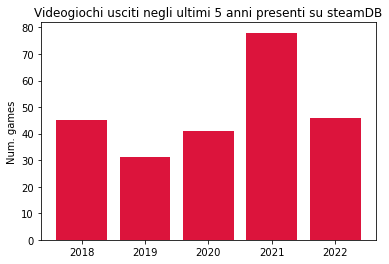

In [131]:
fig,ax = plt.subplots()
rects = ax.bar(range(len(temp['count'])), temp['count'], color='crimson')
ax.set_xticks([ind for ind in inds])
ax.set_xticklabels(temp.index)
ax.set_ylabel('Num. games')
ax.set_title('Videogiochi usciti negli ultimi 5 anni presenti su steamDB')

### Oldest and newest games

In [110]:
games[games['releaseDate']==games['releaseDate'].min() ]

,idGame,gameName,steamName,developer,publisher,releaseDate,categories
381,381,The Curse of Monkey Island,The Curse of Monkey Island,LucasArts,NaN,1997-10-31,"""1990s""; Point & Click; Cult Classic; Adventur..."


In [111]:
games[games['releaseDate']==games['releaseDate'].max() ]

,idGame,gameName,steamName,developer,publisher,releaseDate,categories
380,380,Card Shark,Card Shark,Nerial,Devolver Digital,2022-06-02,Indie; Stealth; Story Rich; Historical; Myster...


### Latest games

In [112]:
games_contemp= games[(games['releaseDate']>='2022-05-05') & (games['releaseDate']<='2022-05-19') ] #periodo di acquisizione dati da Twitch
games_contemp.shape[0]

11

In [113]:
games_contemp

,idGame,gameName,steamName,developer,publisher,releaseDate,categories
137,137,Source of Madness,Source of Madness,Carry Castle,Thunderful Publishing,2022-05-11,Rogue-lite; Lovecraftian; Action; Action RPG; ...
146,146,Eiyuden Chronicle: Rising,Eiyuden Chronicle: Rising,NatsumeAtari,505 Games,2022-05-10,Adventure; RPG; Action RPG; Action-Adventure; ...
297,297,Brigandine: The Legend of Runersia,Brigandine The Legend of Runersia,Happinet,NaN,2022-05-10,Strategy; Turn-Based Strategy; Turn-Based Tact...
473,473,V Rising,V Rising,Stunlock Studios,NaN,2022-05-17,Survival; Open World; Vampire; Crafting; PvP; PvE
603,603,"Warhammer 40,000: Chaos Gate - Daemonhunters","Warhammer 40,000: Chaos Gate - Daemonhunters",Complex Games,Frontier Foundry,2022-05-05,Warhammer 40K; Turn-Based Strategy; Strategy R...
720,720,Arma Reforger,Arma Reforger,Bohemia Interactive,NaN,2022-05-17,Action; Simulation; Strategy; Shooter; Sandbox...
753,753,Ultimate Epic Battle Simulator 2,Ultimate Epic Battle Simulator 2,Brilliant Game Studios,NaN,2022-05-12,Simulation; Action; Strategy; God Game; Sandbo...
820,820,Citizen Sleeper,Citizen Sleeper,Jump Over The Age,Fellow Traveller,2022-05-05,RPG; Cyberpunk; Choices Matter; Tabletop; Expl...
834,834,We Were Here Forever,We Were Here Forever,Total Mayhem Games,NaN,2022-05-10,Exploration; Puzzle; Online Co-Op; Escape Room...
1007,1007,Little Witch in the Woods,Little Witch in the Woods,SUNNY SIDE UP,NaN,2022-05-16,Cute; Pixel Graphics; Funny; RPG; Magic; Relaxing


In [114]:
games_contemp[['gameName',  'categories']]

,gameName,categories
137,Source of Madness,Rogue-lite; Lovecraftian; Action; Action RPG; ...
146,Eiyuden Chronicle: Rising,Adventure; RPG; Action RPG; Action-Adventure; ...
297,Brigandine: The Legend of Runersia,Strategy; Turn-Based Strategy; Turn-Based Tact...
473,V Rising,Survival; Open World; Vampire; Crafting; PvP; PvE
603,"Warhammer 40,000: Chaos Gate - Daemonhunters",Warhammer 40K; Turn-Based Strategy; Strategy R...
720,Arma Reforger,Action; Simulation; Strategy; Shooter; Sandbox...
753,Ultimate Epic Battle Simulator 2,Simulation; Action; Strategy; God Game; Sandbo...
820,Citizen Sleeper,RPG; Cyberpunk; Choices Matter; Tabletop; Expl...
834,We Were Here Forever,Exploration; Puzzle; Online Co-Op; Escape Room...
1007,Little Witch in the Woods,Cute; Pixel Graphics; Funny; RPG; Magic; Relaxing


### Biggest developer

In [115]:
games['developer'].value_counts().to_frame().head(10)

,developer
"CAPCOM Co., Ltd.",14
Square Enix,12
Valve,8
Ubisoft Montreal,7
Arc System Works,6
Capcom,6
Infinity Ward,6
Rockstar Games,5
Konami Digital Entertainment,5
BANDAI NAMCO Studios Inc.,5
